In [60]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd

In [61]:
df=pd.read_csv('Dados_Features.csv')

In [62]:
df = df.dropna(subset = ["MACRO"])
df = df.reset_index(drop=True)
df

,Usuario,Quantidade_Retweets,Quantidade_Likes,Quantidade_Publicacoes,Maior_N_Retweets,Maior_N_Likes,Seguidores,Amigos,Verificado,RN,LN,MACRO,Personalidade
0,APompliano,314654,2564686,486,338,466,1583590,6681,True,647.44,5277.13,NT,INTJ
1,CoinCornerDanny,6030,39698,20,330,1434,30269,2573,False,301.50,1984.90,SP,ISFP
2,AltcoinDailyio,17715,116982,43,748,2808,1139226,535,False,411.98,2720.51,NF,ENFP
3,cz_binance,95670,675162,106,530,1954,5680971,1718,True,902.55,6369.45,NF,INFP
4,GoingParabolic,8724,74153,32,458,444,191341,607,False,272.62,2317.28,NF,INFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,limitstream,4584,2258,5,697,598,49052,274,False,916.80,451.60,NF,INFJ
474,feminist_co,12735,8320,2,11019,7577,198509,0,True,6367.50,4160.00,NF,INFP
475,Sonnenshein,1158,9211,5,238,1639,113887,1083,True,231.60,1842.20,NF,INFJ
476,CedYoungelman,3689,24798,11,297,1186,12787,5577,False,335.36,2254.36,NF,INFP


In [94]:
for i in range(len(df['MACRO'])):
    if df['MACRO'][i] == 'NT':
        df['MACRO'][i] = 0
    elif df['MACRO'][i] == 'NF':
        df['MACRO'][i] = 1
    elif df['MACRO'][i] == 'SJ':
        df['MACRO'][i] = 2
    elif df['MACRO'][i] == 'SP':
        df['MACRO'][i] = 3

In [95]:
X = df[['Quantidade_Retweets','Quantidade_Likes','Quantidade_Publicacoes','Seguidores','Amigos']].values

y = df["MACRO"].values
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [76]:
type(y)

numpy.ndarray

In [83]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(382, 5) (96, 5) (382,) (96,)


DecisionTreeClassifier = 0.43
RandomForestClassifier = 0.47
KNeighborsClassifier = 0.51
SVC (C-Support Vector Classification) = 0.56
QuadraticDiscriminantAnalysis = 0.21
GaussianNB = 0.14
LinearSVC = 0.21

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 26.72it/s]


In [92]:
models.sort_values('Accuracy',ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.59,0.28,None,0.47,0.02
LinearDiscriminantAnalysis,0.59,0.28,None,0.47,0.01
RidgeClassifier,0.59,0.28,None,0.47,0.01
RidgeClassifierCV,0.59,0.28,None,0.47,0.01
LinearSVC,0.59,0.28,None,0.47,0.04
LabelPropagation,0.57,0.29,None,0.48,0.01
LabelSpreading,0.57,0.29,None,0.48,0.01
SVC,0.57,0.26,None,0.43,0.01
PassiveAggressiveClassifier,0.56,0.25,None,0.41,0.01


In [129]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import LinearSVC
from matplotlib import pyplot

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


# define dataset
# define the model
model = LinearSVC()
# fit the model
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [131]:
clf.score

TypeError: 'function' object is not subscriptable

Feature: 0, Score: 0.00418
Feature: 1, Score: 0.05649
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00167
Feature: 4, Score: -0.00251
Feature: 5, Score: 0.07992
Feature: 6, Score: -0.00335
Feature: 7, Score: 0.00000


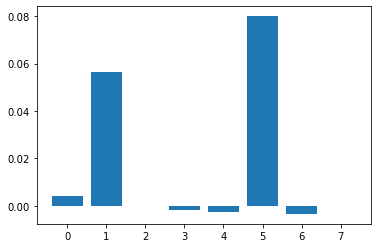

In [20]:
# linear regression feature importance
from sklearn.datasets import make_regression

from sklearn.inspection import permutation_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from matplotlib import pyplot
# define dataset
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [25]:
from sklearn import metrics

model.score(X_test, y_test)

0.2916666666666667